In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Base path notebooks Colab
base_path = '/content/drive/MyDrive/Colab Notebooks'

# Complete path Big data directory
big_data_path = os.path.join(base_path, 'Big Data')

# Big data directory verification
if not os.path.exists(big_data_path):
    os.makedirs(big_data_path)
    print(f"Directory created: {big_data_path}")
else:
    print(f"The directory already exists: {big_data_path}")
    # Print directory if exists
    try:
        print("Big Data directory contents:")
        print(os.listdir(big_data_path))
    except:
        print("Unable to read the directory contents")

# Homework 1 path
homework1Path = os.path.join(big_data_path, "Homework 1")

# If HW 1 path exists
if not os.path.exists(homework1Path):
    os.makedirs(homework1Path)
    print(f"Directory created: {homework1Path}")
else:
    print(f"The directory already exists: {homework1Path}")

# Results path
resultPath = os.path.join(homework1Path, "results")

Mounted at /content/drive
The directory already exists: /content/drive/MyDrive/Colab Notebooks/Big Data
Big Data directory contents:
['Homework 1']
The directory already exists: /content/drive/MyDrive/Colab Notebooks/Big Data/Homework 1


In [ ]:
output_path = os.path.join(resultPath, "plot")

# Create directory if not exists
os.makedirs(output_path, exist_ok=True)

First Query: Number of studies started per year

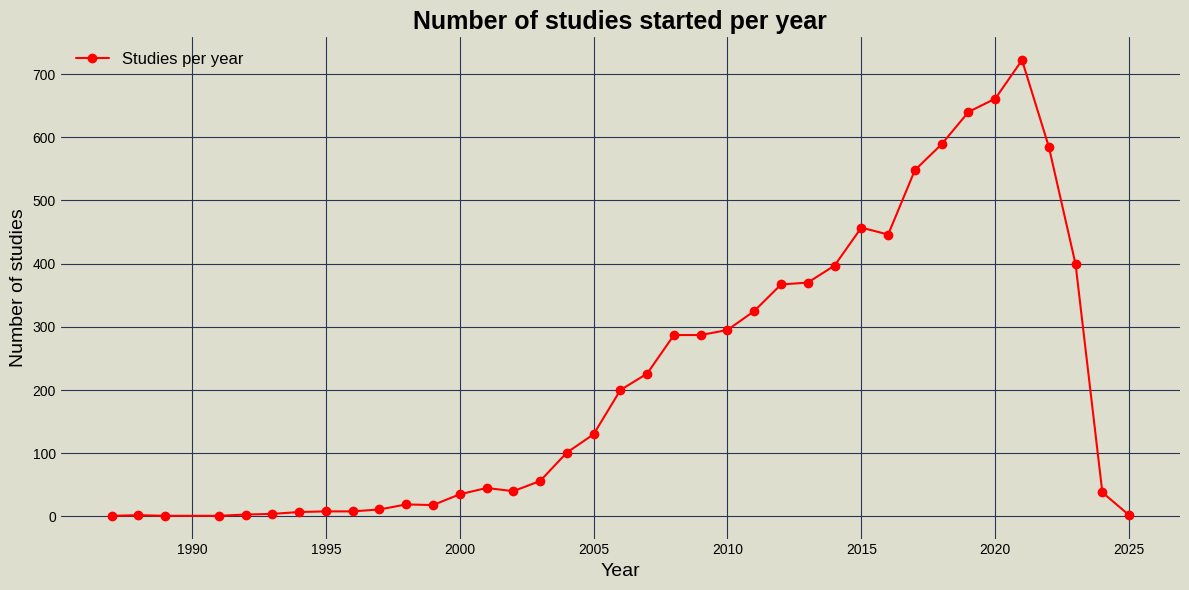

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request

df = pd.read_csv(resultPath+"/studiesPerYear.csv", index_col=0)
df = df.sort_values("Start Year")

# Download .mplstyle file if doesn't exist
style_url = 'https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle'
style_path = 'pitayasmoothie-dark.mplstyle'

if not os.path.exists(style_path):
    urllib.request.urlretrieve(style_url, style_path)

# Applying style
plt.style.use(style_path)

# Creating line chart
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#dedece')  # General background (Around the chart)
ax.set_facecolor('#dedece')         # Chart area background


# Title with big font and bold
ax.set_title("Number of studies started per year", fontsize=18, fontweight='bold', color='black')

# Axes labels
ax.set_xlabel("Year", fontsize=14, color='black')
ax.set_ylabel("Number of studies", fontsize=14, color='black')

# Axis ticks
ax.tick_params(axis='x', labelsize=10, labelcolor='black')
ax.tick_params(axis='y', labelsize=10, labelcolor='black')

# Personalized legends
plt.plot(df["Start Year"], df["NumStudies per Year"], marker='o', linestyle='-', color='red', label="Studies per year")
leg = ax.legend(facecolor='#eeeeee', edgecolor='black', fontsize=12, labelcolor='black')

# Saving file
image_file = os.path.join(output_path, "studies_per_year.png")
plt.tight_layout()
plt.savefig(image_file, dpi=300, facecolor=fig.get_facecolor())

# Plotting
plt.show()

Second Query: Mean Participant per Clinical Study Title

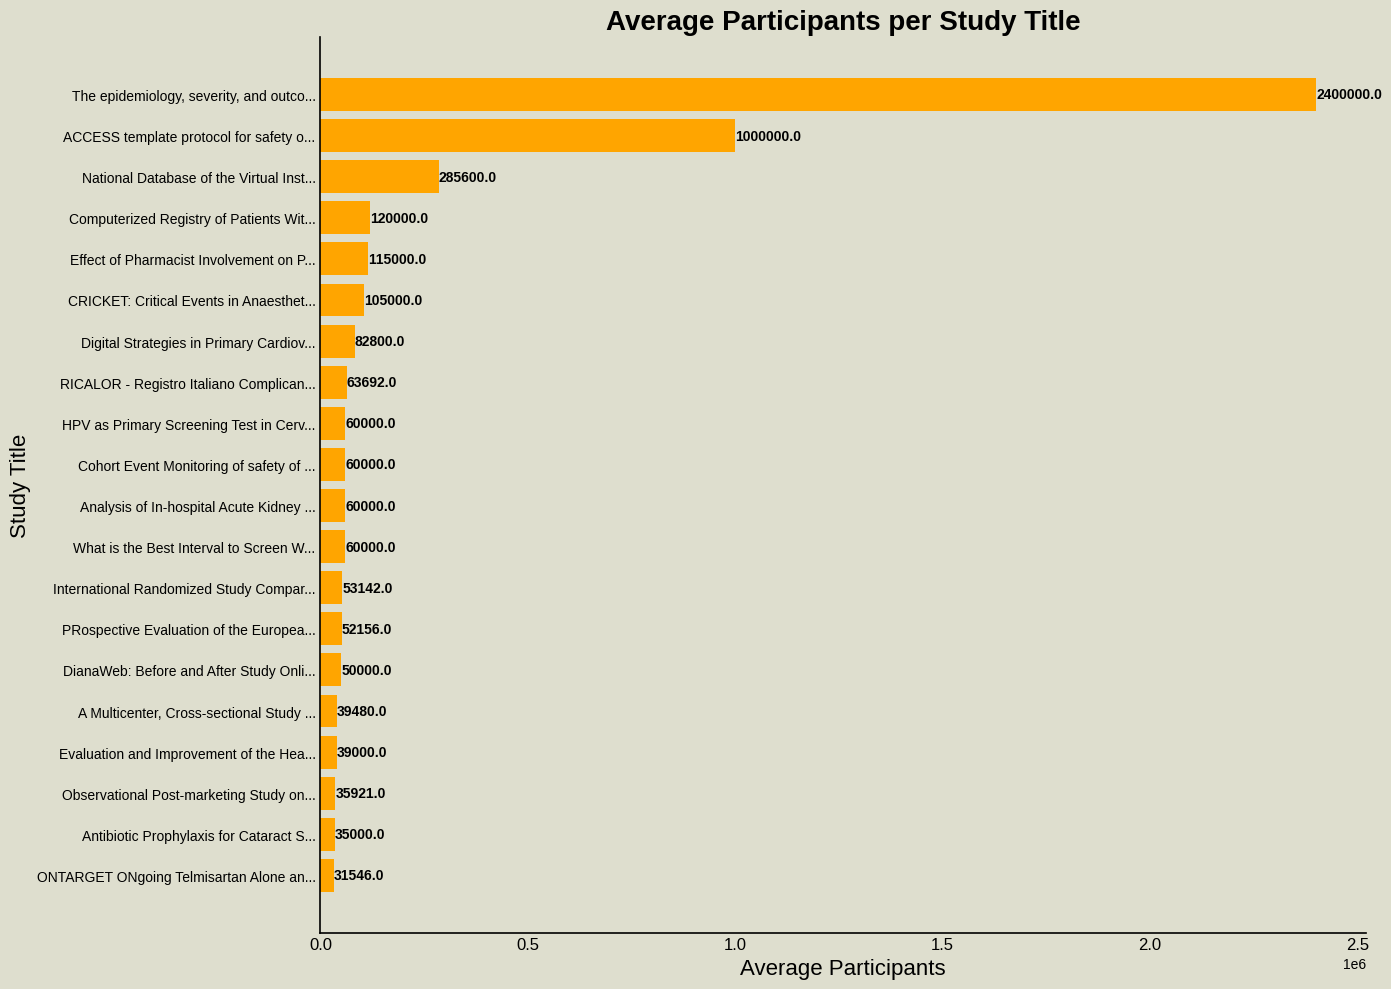

In [ ]:
# Load data from the CSV generated by the query
df = pd.read_csv(os.path.join(resultPath, "averagePerTitle.csv"))

# Get top 20 titles with highest average number of participants
top_20 = df.head(20)

# Apply the downloaded style
plt.style.use(style_path)

# Reverse order to show highest at the top
top_20 = top_20.sort_values('Average per Title')

# Truncate long titles
max_len = 40  # maximum characters for title
top_20['Short Title'] = top_20['Title'].apply(lambda x: x if len(x) <= max_len else x[:max_len - 3] + '...')

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor('#dedece')  # Outer background color
ax.set_facecolor('#dedece')         # Plot area background color

# Create horizontal bars
bars = ax.barh(top_20['Short Title'], top_20['Average per Title'], color='orange')

# Add values at end of each bar
for i, v in enumerate(top_20['Average per Title']):
    # text next to bar
    ax.text(v + 5, i, f'{v:.1f}', va='center', fontsize=10, color='black', fontweight='bold')

# Disable grid
ax.grid(False)

# Make left and bottom axes visible
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Hide other borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Customize border color and thickness (optional)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Title with large bold font
ax.set_title("Average Participants per Study Title", fontsize=20, fontweight='bold', color='black')

# Axis labels
ax.set_xlabel("Average Participants", fontsize=16, color='black')
ax.set_ylabel("Study Title", fontsize=16, color='black')

# Axis ticks
ax.tick_params(axis='x', labelsize=12, labelcolor='black')
ax.tick_params(axis='y', labelsize=10, labelcolor='black')

# Adjust layout to prevent label overlap
plt.tight_layout()

# Save plot
image_file = os.path.join(output_path, "average_per_title.png")
plt.savefig(image_file, dpi=300, facecolor=fig.get_facecolor())

# Display plot
plt.show()

Third query: Top 10 Most frequent Medical Condition

Pie chart successfully created and saved to: /content/drive/MyDrive/Colab Notebooks/Big Data/Homework 1/results/plot/top10_medical_condition.png


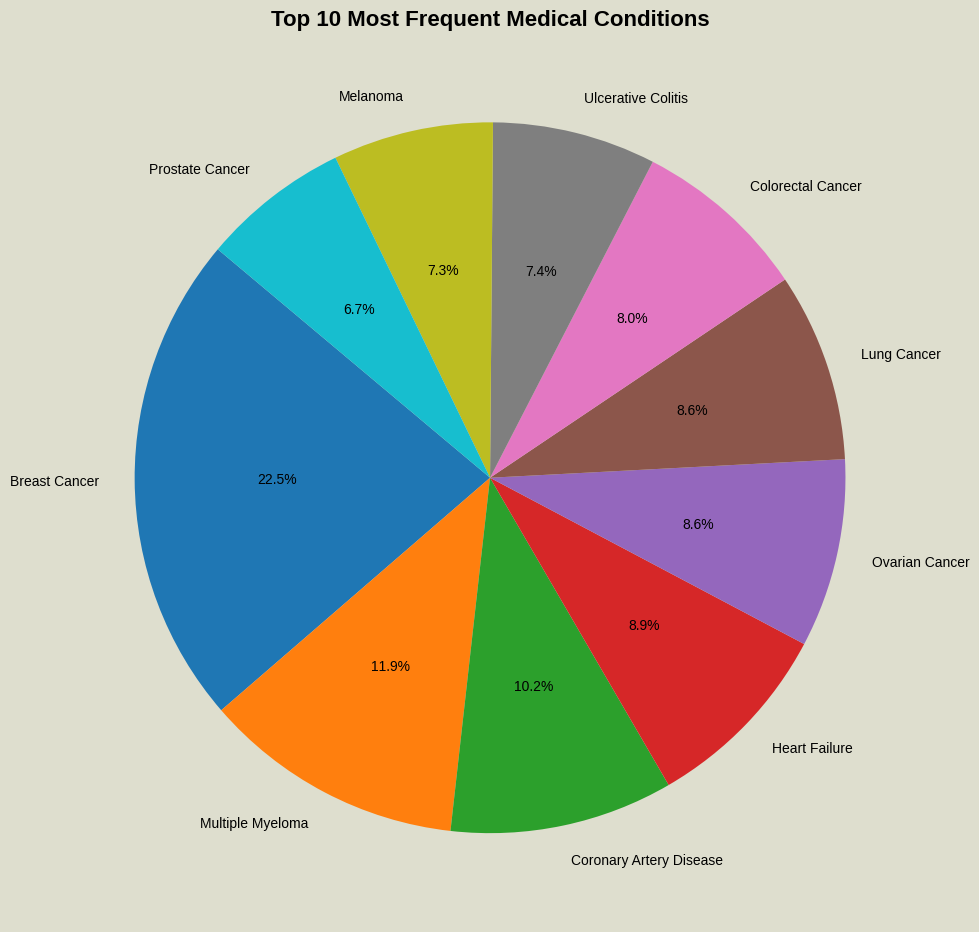

In [ ]:
# Load the CSV exported from Spark
df = pd.read_csv(os.path.join(resultPath, "top10MedicalCondition.csv"))

# Set the style (optional)
plt.style.use("ggplot")  # or your custom style_path if you have one

# Extract data
labels = df['Condition']
sizes = df['Count per Condition']

# Custom colors (optional)
colors = plt.cm.tab10.colors  # a palette with 10 distinct colors

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'color': 'black', 'fontsize': 10}
)
fig.patch.set_facecolor('#dedece')  # Set background color

# Add title
ax.set_title("Top 10 Most Frequent Medical Conditions", fontsize=16, fontweight='bold', color="black")

# Adjust layout to prevent label clipping
plt.tight_layout()

# Save the chart
image_file = os.path.join(output_path, "top10_medical_condition.png")
plt.savefig(image_file, dpi=300, facecolor=fig.get_facecolor())

# Print confirmation message
print("Pie chart successfully created and saved to:", image_file)

# Display the chart
plt.show()

Fourth Analitic: Country with the most participants mean per Type of study

Bar chart successfully saved to: /content/drive/MyDrive/Colab Notebooks/Big Data/Homework 1/results/plot/maxCountryAvgPerStudyType_barchart.png


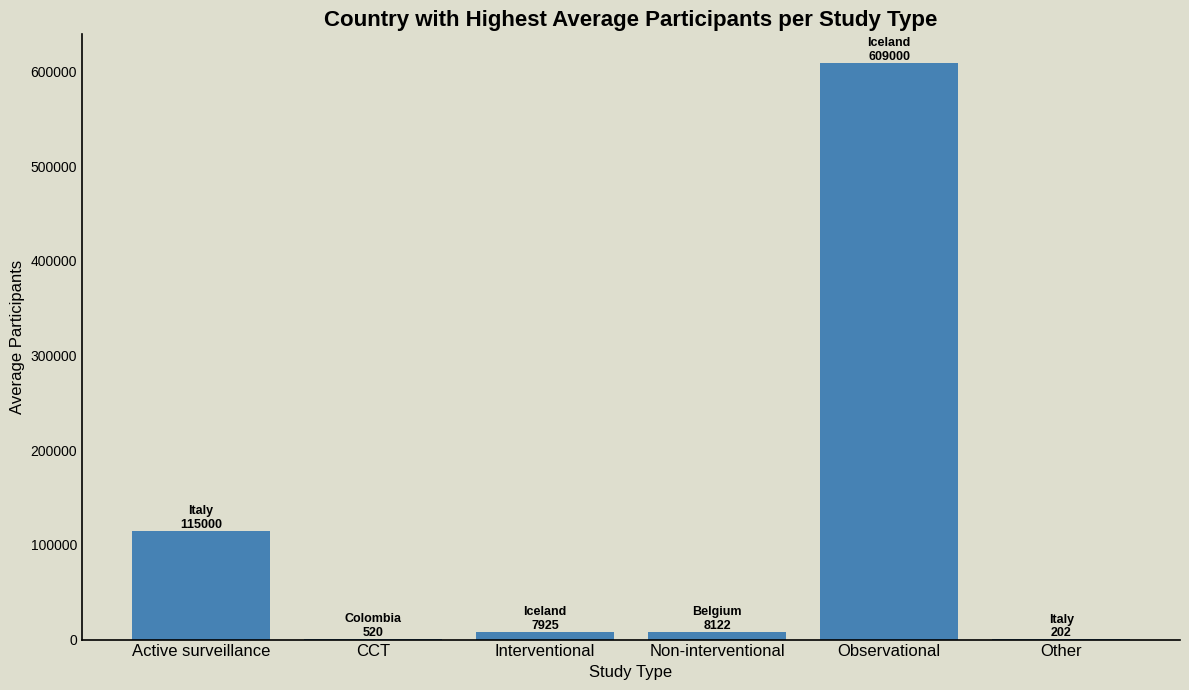

In [ ]:
# Load the CSV exported from Spark
df = pd.read_csv(os.path.join(resultPath, "maxCountryAvgPerStudyType.csv"))

# Apply the same style as before
plt.style.use(style_path)

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.bar(df["Study Type"], df["Average per Type/Country"], color='steelblue')
fig.patch.set_facecolor('#dedece')  # General background (around the chart)
ax.set_facecolor('#dedece')         # Chart area background

# Add value labels and country names above each bar
for i, (val, country) in enumerate(zip(df["Average per Type/Country"], df["Country"])):
    ax.text(i, val + 5, f"{country}\n{val:.0f}", ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

# Title and axis labels
ax.set_title("Country with Highest Average Participants per Study Type", fontsize=16, fontweight='bold', color='black')
ax.set_ylabel("Average Participants", fontsize=12, color='black')
ax.set_xlabel("Study Type", fontsize=12, color='black')

# Grid removal + customization
ax.grid(False)
# Hide top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Color and thickness (optional)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Axis ticks
ax.tick_params(axis='x', labelsize=12, labelcolor='black')
ax.tick_params(axis='y', labelsize=10, labelcolor='black')

# Adjust layout
plt.tight_layout()

# Save the chart
image_file = os.path.join(output_path, "maxCountryAvgPerStudyType_barchart.png")
plt.savefig(image_file, dpi=300, facecolor=fig.get_facecolor())

# Print confirmation
print(f"Bar chart successfully saved to: {image_file}")

# Display the chart
plt.show()

Sesta Analitica

Processing map projections...
Map successfully saved to: /content/drive/MyDrive/Colab Notebooks/Big Data/Homework 1/results/plot/female_studies_map.png


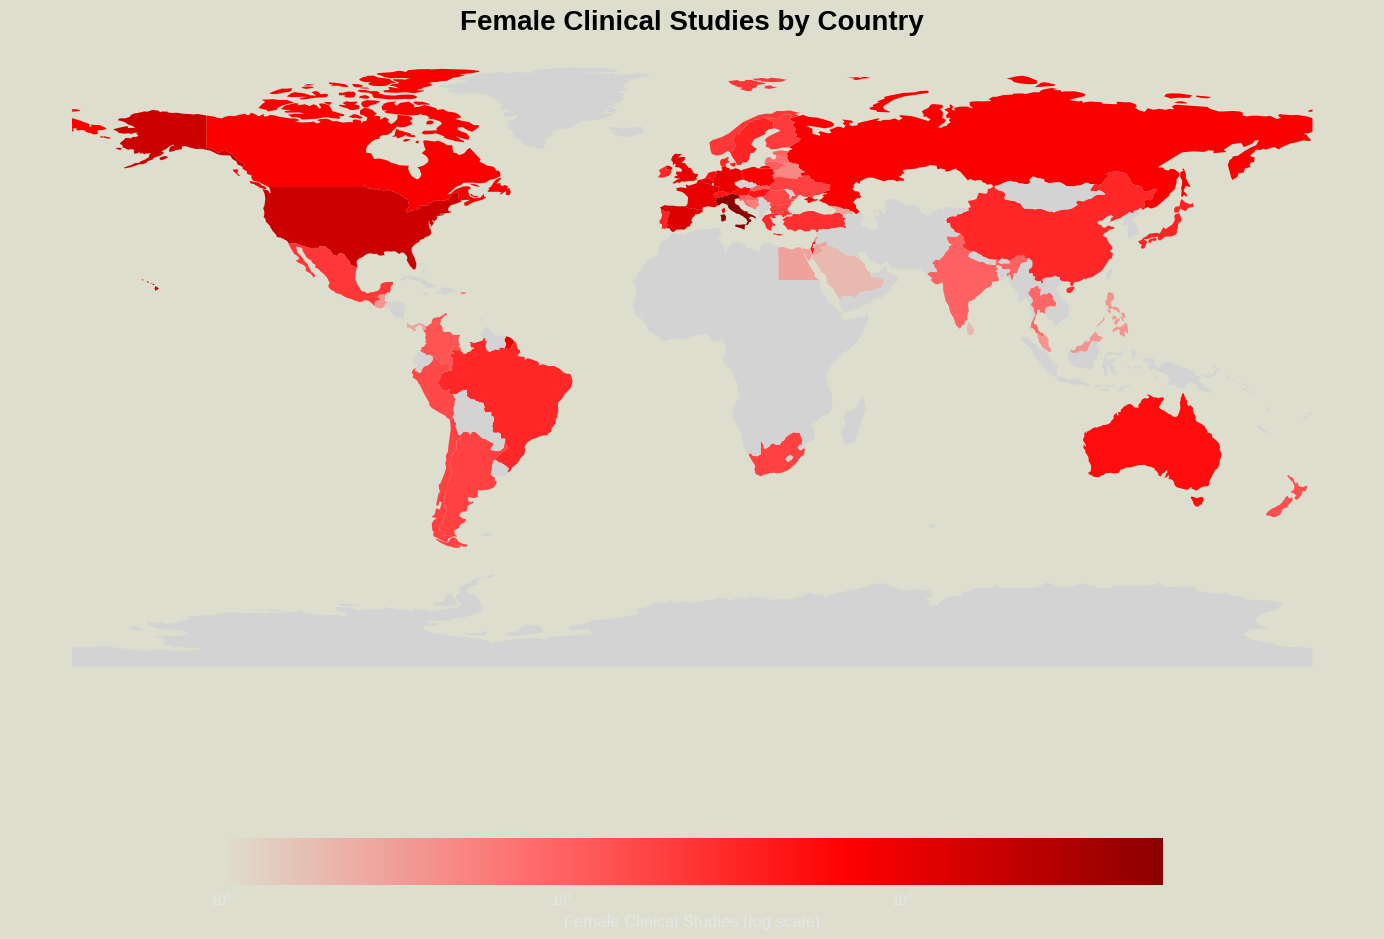

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, LogNorm
import urllib.request
import os
import numpy as np

# Load data
df = pd.read_csv(os.path.join(resultPath, "6_nationSponsorWomen.csv"))

# Fix duplicate country names
country_mapping = {
    'United States': 'United States of America',
    'Russian Federation': 'Russia',
    'Czechia': 'Czech Republic',
    'Macedonia, The Former Yugoslav Republic of': 'North Macedonia',
    'Holy See (Vatican City State)': 'Vatican City',
    'South Korea': 'Korea, Republic of',
    'Swaziland': 'Eswatini',
    'Brunei Darussalam': 'Brunei',
    'Taiwan': 'Taiwan, Province of China'
}
df['Nation'] = df['Nation'].replace(country_mapping)
df = df.groupby('Nation', as_index=False).sum()

# Load world map data
print("Downloading world map data...")
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# Standardize names and simplify geometries for better performance
world = world.rename(columns={'ADMIN': 'Nation_Mapped'})
world['geometry'] = world['geometry'].simplify(0.05)

# Merge datasets
df['Nation_Mapped'] = df['Nation']
merged = world.set_index('Nation_Mapped').join(df.set_index('Nation_Mapped'))

# Create custom colormap and logarithmic normalization
cmap = LinearSegmentedColormap.from_list("custom_cmap", ['#dedece', '#ff6b6b', '#ff0000', '#8b0000'])
# Handle zero values for robust logarithmic normalization
non_zero_female_studies = df['NumFemaleStudies per Nation'][df['NumFemaleStudies per Nation'] > 0]
vmin = non_zero_female_studies.min() if not non_zero_female_studies.empty else 1  # Default minimum value if all are zero
norm = LogNorm(vmin=vmin, vmax=df['NumFemaleStudies per Nation'].max())

# Apply style
plt.style.use(style_path)

# Create plot
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor('#dedece')  # Figure background
ax.set_facecolor('#dedece')         # Axes background

# Plot the choropleth map
merged.plot(
    column='NumFemaleStudies per Nation',
    ax=ax,
    cmap=cmap,
    norm=norm,
    legend=True,
    missing_kwds={'color': 'lightgrey', 'label': 'No data available'},
    legend_kwds={'label': "Female Clinical Studies (log scale)", 'orientation': "horizontal", 'shrink': 0.6}
)

# Add title
ax.set_title("Female Clinical Studies by Country", fontsize=20, fontweight='bold', color='black')
ax.axis('off')

# Reproject to calculate accurate centroids (for potential future use)
print("Processing map projections...")
world_proj = world.to_crs(epsg=3857)  # Using Web Mercator projection

# Save the visualization
plt.tight_layout()
image_file = os.path.join(output_path, "female_studies_map.png")
plt.savefig(image_file, dpi=300, facecolor=fig.get_facecolor())
print(f"Map successfully saved to: {image_file}")

# Display the plot
plt.show()

Settima Analitica

Map visualization successfully saved to: /content/drive/MyDrive/Colab Notebooks/Big Data/Homework 1/results/plot/minors_collaborators_map.png


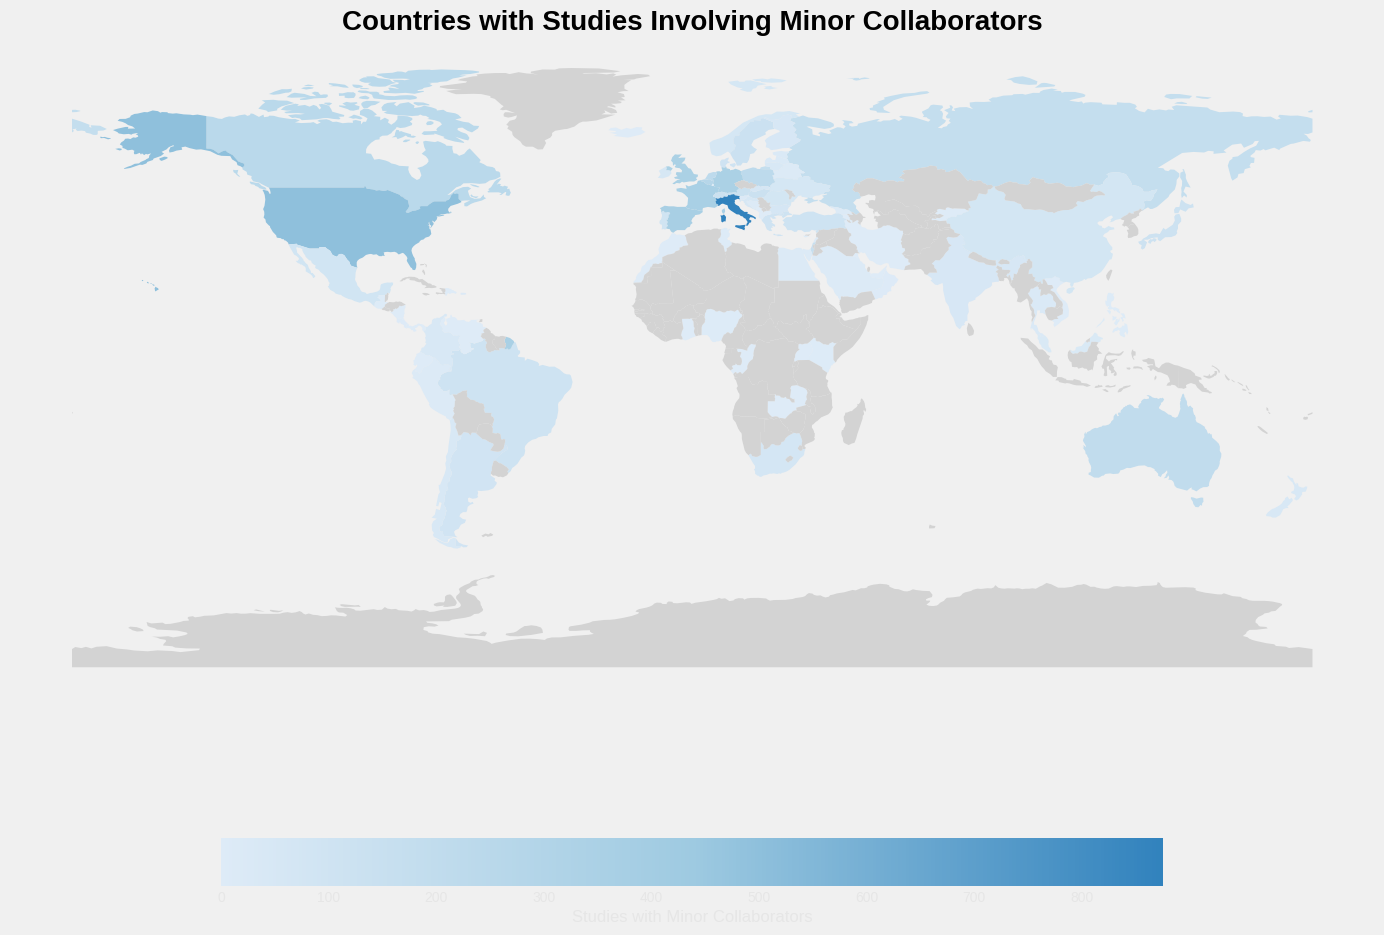

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
import urllib.request
import os
import numpy as np

# Load data from the CSV you created
df = pd.read_csv(os.path.join(resultPath, "7_nationMinorsCollaborators.csv"))
df = df.rename(columns={'Country': 'Nation', 'Count of Studies per Country': 'NumStudiesWithMinors'})

# Fix duplicate country names (keeping your existing mappings)
country_mapping = {
    'United States': 'United States of America',
    'Russian Federation': 'Russia',
    'Czechia': 'Czech Republic',
    'Macedonia, The Former Yugoslav Republic of': 'North Macedonia',
    'Holy See (Vatican City State)': 'Vatican City',
    'South Korea': 'Korea, Republic of',
    'Swaziland': 'Eswatini',
    'Brunei Darussalam': 'Brunei',
    'Taiwan': 'Taiwan, Province of China'
}
df['Nation'] = df['Nation'].replace(country_mapping)
df = df.groupby('Nation', as_index=False).sum()  # Regroup after name correction

# Load world map data
print("Downloading world map data...")
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# Standardize names and simplify geometries for better performance
world = world.rename(columns={'ADMIN': 'Nation_Mapped'})
world['geometry'] = world['geometry'].simplify(0.05)

# Merge datasets
df['Nation_Mapped'] = df['Nation']
merged = world.set_index('Nation_Mapped').join(df.set_index('Nation_Mapped'))

# Create colormap and normalization (using linear scale here, could use LogNorm if distribution is skewed)
cmap = LinearSegmentedColormap.from_list("custom_cmap", ['#deebf7', '#9ecae1', '#3182bd'])
norm = Normalize(vmin=0, vmax=df['NumStudiesWithMinors'].max())  # Assuming 0 is a valid value

# Apply style
plt.style.use(style_path)

# Create plot
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor('#f0f0f0')  # Slightly different background color
ax.set_facecolor('#f0f0f0')

# Plot the choropleth map
merged.plot(
    column='NumStudiesWithMinors',
    ax=ax,
    cmap=cmap,
    norm=norm,
    legend=True,
    missing_kwds={'color': 'lightgrey', 'label': 'No data available'},
    legend_kwds={'label': "Studies with Minor Collaborators", 'orientation': "horizontal", 'shrink': 0.6}
)

# Add title
ax.set_title("Countries with Studies Involving Minor Collaborators", fontsize=20, fontweight='bold', color='black')
ax.axis('off')

# Save visualization
plt.tight_layout()
image_file = os.path.join(output_path, "minors_collaborators_map.png")
plt.savefig(image_file, dpi=300, facecolor=fig.get_facecolor())
print(f"Map visualization successfully saved to: {image_file}")

# Display plot
plt.show()

Ottava Analitica

Bar chart successfully saved to: /content/drive/MyDrive/Colab Notebooks/Big Data/Homework 1/results/plot/top_city_cancer_barchart.png


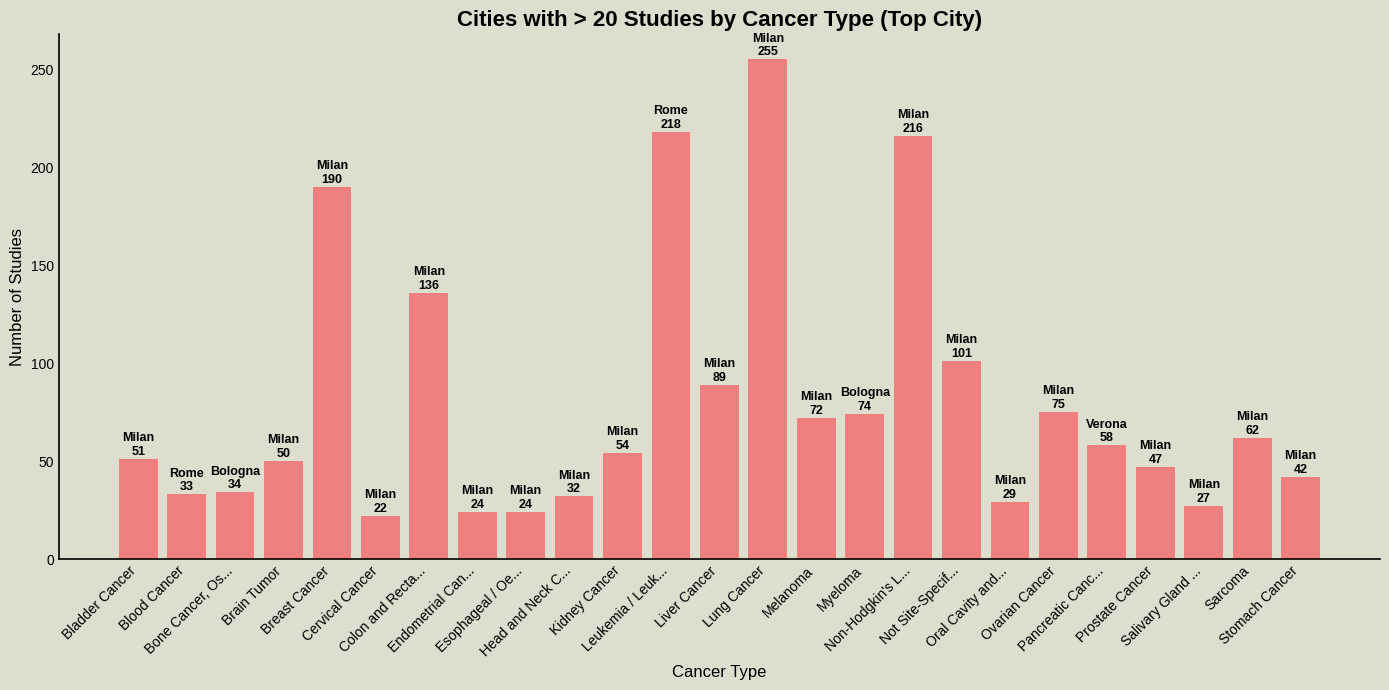

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns  # For better color management

# Load data
df = pd.read_csv(os.path.join(resultPath, "8_topCityCancer.csv"))

# Sort data by number of studies in descending order within each cancer type
df_sorted = df.sort_values(by=['Cancer Type', 'NumStudies per City/Cancer'], ascending=[True, False])

# Get the top city (with most studies) for each cancer type
###### NON SERVE, GIà LA QUERY HA PLOTTATO LA CITTà CON PIù STUDI PER CANCRO ######
#df_top_city_per_cancer = df_sorted.groupby('Cancer Type').first().reset_index()

# Threshold for displaying bars
threshold = 20  # Set your desired threshold

# Filter DataFrame based on threshold
df_filtered = df_sorted[df_sorted['NumStudies per City/Cancer'] > threshold].copy()  # Use .copy() to avoid warnings

# Limit cancer type name length for better display
max_len = 15
df_filtered['Cancer Type Abbreviated'] = df_filtered['Cancer Type'].apply(
    lambda x: x[:max_len] + '...' if len(x) > max_len else x
)

# Apply style
plt.style.use(style_path)

# Create the plot
fig, ax = plt.subplots(figsize=(14, 7))  # Increased width to better accommodate labels
bar_color = 'lightcoral'  # New color for bars
bars = ax.bar(df_filtered["Cancer Type Abbreviated"], df_filtered["NumStudies per City/Cancer"], color=bar_color)
fig.patch.set_facecolor('#dedece')   # Figure background
ax.set_facecolor('#dedece')         # Plot area background

# Add value labels and city names above each bar
for bar, city, val in zip(bars, df_filtered["City"], df_filtered["NumStudies per City/Cancer"]):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5,
            f"{city}\n{int(val)}",
            ha='center', va='bottom',
            fontsize=9, fontweight='bold', color='black')

# Title and axis labels
ax.set_title(f"Cities with > {threshold} Studies by Cancer Type (Top City)", fontsize=16, fontweight='bold', color='black')
ax.set_ylabel("Number of Studies", fontsize=12, color='black')
ax.set_xlabel("Cancer Type", fontsize=12, color='black')

# Grid removal and border customization
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Axis ticks
ax.tick_params(axis='y', labelsize=10, labelcolor='black')
plt.xticks(rotation=45, ha='right', fontsize=10, color='black')  # Reduced fontsize for better readability

# Adjust layout and save
plt.tight_layout()
image_file = os.path.join(output_path, "top_city_cancer_barchart.png")
plt.savefig(image_file, dpi=300, facecolor=fig.get_facecolor())
print(f"Bar chart successfully saved to: {image_file}")

# Display plot
plt.show()

TenTh Analytics: Studies with Highest Media Visibility (Altmetric Score)

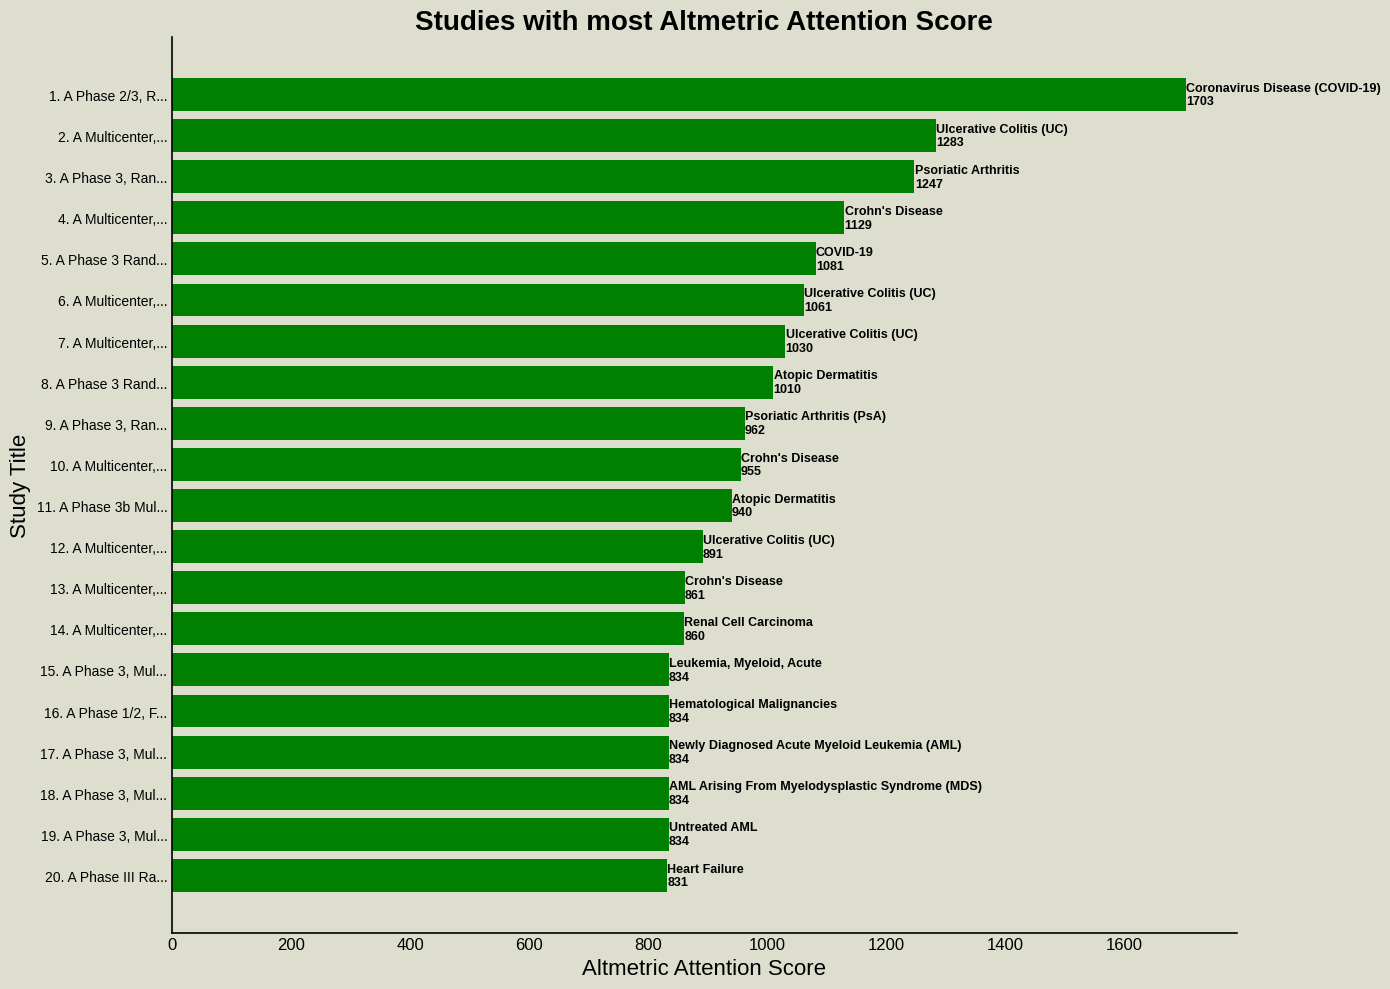

In [ ]:
# Load data from the CSV generated by the query
df = pd.read_csv(os.path.join(resultPath, "10_topAltmetricScore.csv"))

# Get top 20 titles with highest average number of participants
top_20 = df.head(20)

# Apply the downloaded style
plt.style.use(style_path)

# Reverse order to show highest at the top
top_20 = top_20.sort_values('Altmetric Attention Score')

# Truncate long titles
max_len = 20  # maximum characters for title
# indentifier for short unique short titles
top_20['Short Title'] = [
    f"{20-(i)}. {t if len(t) <= max_len else t[:max_len - 6] + '...'}"
    for i, t in enumerate(top_20['Title'])
]

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor('#dedece')  # Outer background color
ax.set_facecolor('#dedece')         # Plot area background color

# Create horizontal bars
bars = ax.barh(top_20['Short Title'], top_20['Altmetric Attention Score'], color='green')

# Add values at end of each bar
for bar, condition, val in zip(bars, top_20["Condition"], top_20["Altmetric Attention Score"]):
    xval = bar.get_width()
    ax.text(xval + 0.5,
            bar.get_y() + bar.get_height()/2,
            f"{condition}\n{int(val)}",
            ha='left',  # Allineamento orizzontale a sinistra del punto
            va='center',  # Allineamento verticale al centro
            fontsize=9,
            fontweight='bold',
            color='black')

# Disable grid
ax.grid(False)

# Make left and bottom axes visible
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Hide other borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Customize border color and thickness (optional)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Title with large bold font
ax.set_title("Studies with most Altmetric Attention Score", fontsize=20, fontweight='bold', color='black')

# Axis labels
ax.set_xlabel("Altmetric Attention Score", fontsize=16, color='black')
ax.set_ylabel("Study Title", fontsize=16, color='black')

# Axis ticks
ax.tick_params(axis='x', labelsize=12, labelcolor='black')
ax.tick_params(axis='y', labelsize=10, labelcolor='black')

# Adjust layout to prevent label overlap
plt.tight_layout()

# Save plot
image_file = os.path.join(output_path, "altmetric_attention_score_studies.png")
plt.savefig(image_file, dpi=300, facecolor=fig.get_facecolor())

# Display plot
plt.show()

Eleventh Analytics: Conditions with Highest Average Media Visibility (Altmetric Attention Score)

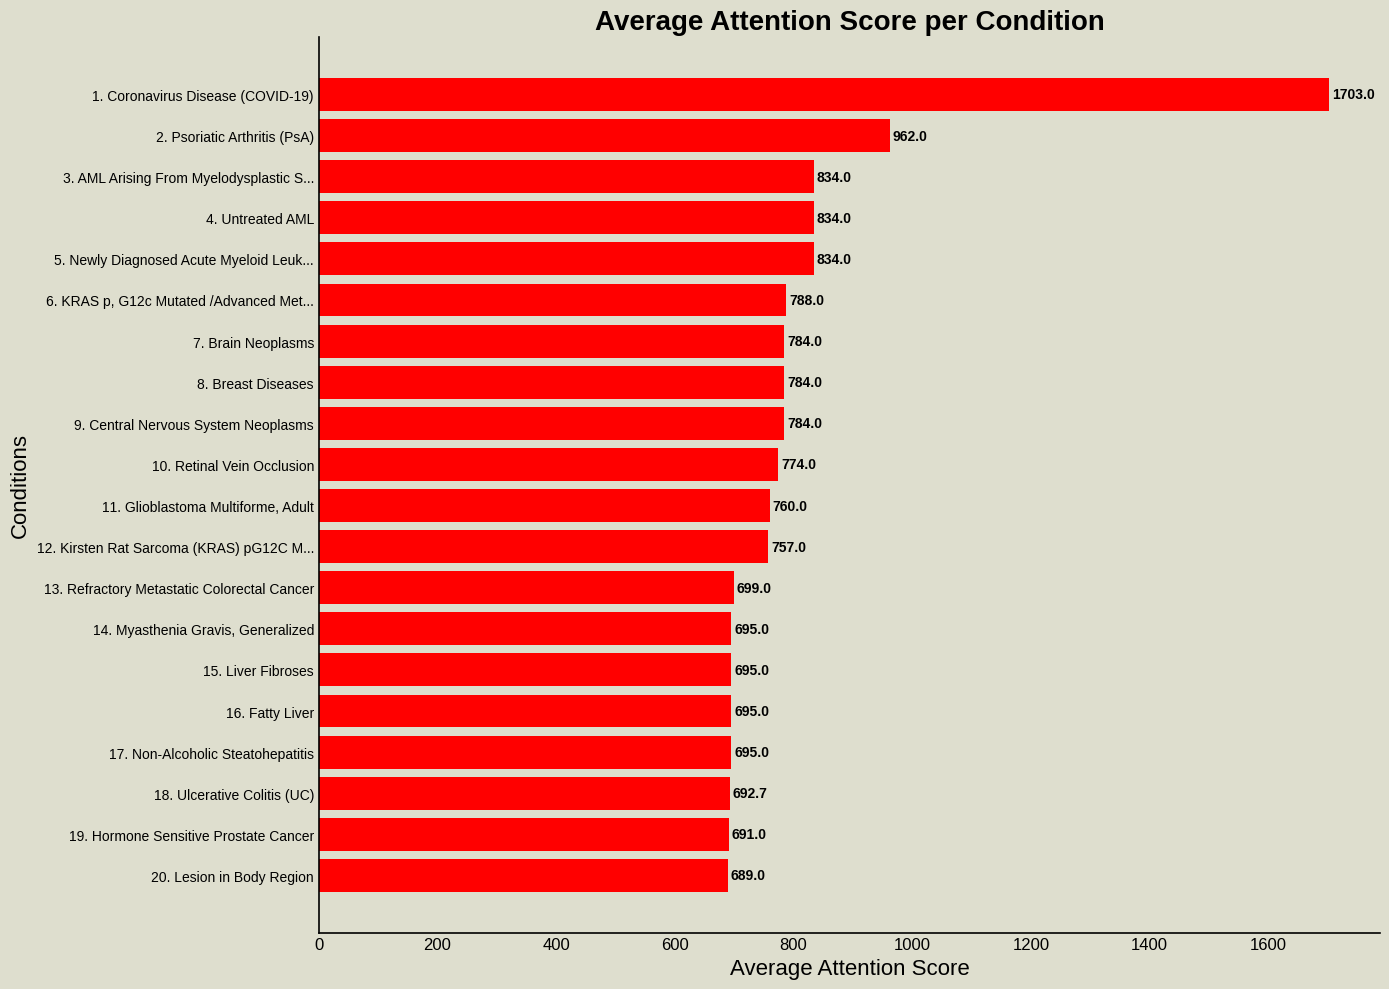

In [ ]:
# Load data from the CSV generated by the query
df = pd.read_csv(os.path.join(resultPath, "11_topConditionsAltmetricScore.csv"))

# Get top 20 titles with highest average number of participants
top_20 = df.head(20)

# Apply the downloaded style
plt.style.use(style_path)

# Reverse order to show highest at the top
top_20 = top_20.sort_values('Average Attention Score')

# Truncate long titles
max_len = 40  # maximum characters for title
top_20['Short Condition'] = [
    f"{20-(i)}. {t if len(t) <= max_len else t[:max_len - 6] + '...'}"
    for i, t in enumerate(top_20['Condition'])
]

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor('#dedece')  # Outer background color
ax.set_facecolor('#dedece')         # Plot area background color

# Create horizontal bars
bars = ax.barh(top_20['Short Condition'], top_20['Average Attention Score'], color='red')

# Add values at end of each bar
for i, v in enumerate(top_20['Average Attention Score']):
    # text next to bar
    ax.text(v + 5, i, f'{v:.1f}', va='center', fontsize=10, color='black', fontweight='bold')

# Disable grid
ax.grid(False)

# Make left and bottom axes visible
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Hide other borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Customize border color and thickness (optional)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Title with large bold font
ax.set_title("Average Attention Score per Condition", fontsize=20, fontweight='bold', color='black')

# Axis labels
ax.set_xlabel("Average Attention Score", fontsize=16, color='black')
ax.set_ylabel("Conditions", fontsize=16, color='black')

# Axis ticks
ax.tick_params(axis='x', labelsize=12, labelcolor='black')
ax.tick_params(axis='y', labelsize=10, labelcolor='black')

# Adjust layout to prevent label overlap
plt.tight_layout()

# Save plot
image_file = os.path.join(output_path, "average_score_conditions.png")
plt.savefig(image_file, dpi=300, facecolor=fig.get_facecolor())

# Display plot
plt.show()

Thirteenth Analytics: Researchers Who Participated in the Most Studies, with Their Most Frequently Studied Condition

Chart saved to: /content/drive/MyDrive/Colab Notebooks/Big Data/Homework 1/results/plot/top_investigators_condition.png


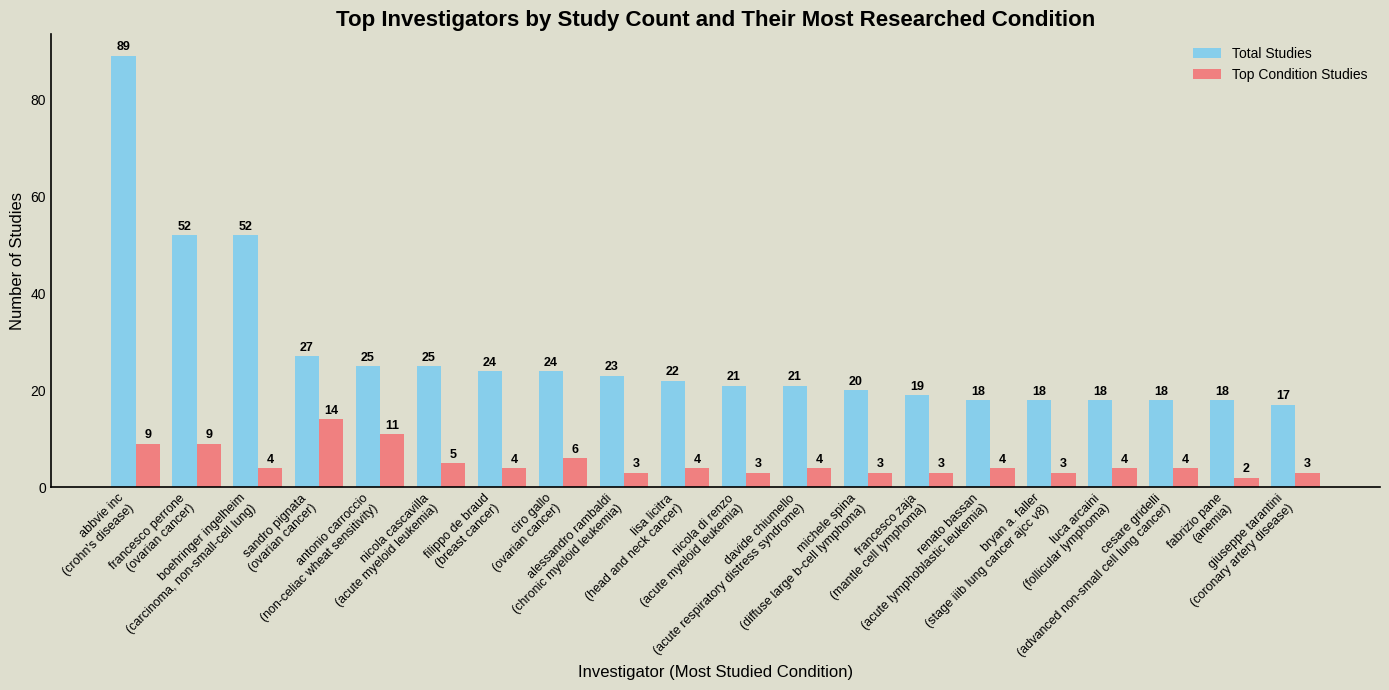

In [ ]:
import numpy as np

# Load data
df = pd.read_csv(os.path.join(resultPath, "13_topInvestigatorWithCondition.csv"))
df = df.head(20)

# Parameters
bar_width = 0.4
x = np.arange(len(df))  # x-position for each group

# Plot setup
fig, ax = plt.subplots(figsize=(14, 7))
fig.patch.set_facecolor('#dedece')
ax.set_facecolor('#dedece')

# Side-by-side bars
bars1 = ax.bar(x - bar_width/2, df["Number of Studies"], width=bar_width, label="Total Studies", color='skyblue')
bars2 = ax.bar(x + bar_width/2, df["Top Condition Count"], width=bar_width, label="Top Condition Studies", color='lightcoral')

# Add value labels above bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5,
                f"{int(yval)}", ha='center', va='bottom',
                fontsize=9, fontweight='bold', color='black')

# Create combined x-axis labels
df["XLabel"] = df["Investigator"] + "\n(" + df["Top Condition"] + ")"

# Set x-tick labels with condition below investigator name
ax.set_xticks(x)
ax.set_xticklabels(df["XLabel"], rotation=45, ha='right', fontsize=9, color='black')

# Axis ticks
ax.tick_params(axis='y', labelsize=10, labelcolor='black')
ax.yaxis.set_visible(True)

# Titles and legend
ax.set_title("Top Investigators by Study Count and Their Most Researched Condition",
             fontsize=16, fontweight='bold', color='black')
ax.set_ylabel("Number of Studies", fontsize=12, color='black')
ax.set_xlabel("Investigator (Most Studied Condition)", fontsize=12, color='black')

# Legend with black text
legend = ax.legend()
for text in legend.get_texts():
    text.set_color("black")

# Styling
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

plt.tight_layout()

# Save and show
image_file = os.path.join(output_path, "top_investigators_condition.png")
plt.savefig(image_file, dpi=300, facecolor=fig.get_facecolor())
print(f"Chart saved to: {image_file}")

plt.show()

Fifteenth Analytics: Collaborations of the University of Naples Federico II with funding bodies (with counts)

Bar chart successfully saved to: /content/drive/MyDrive/Colab Notebooks/Big Data/Homework 1/results/plot/FedericoII_collaborators.png


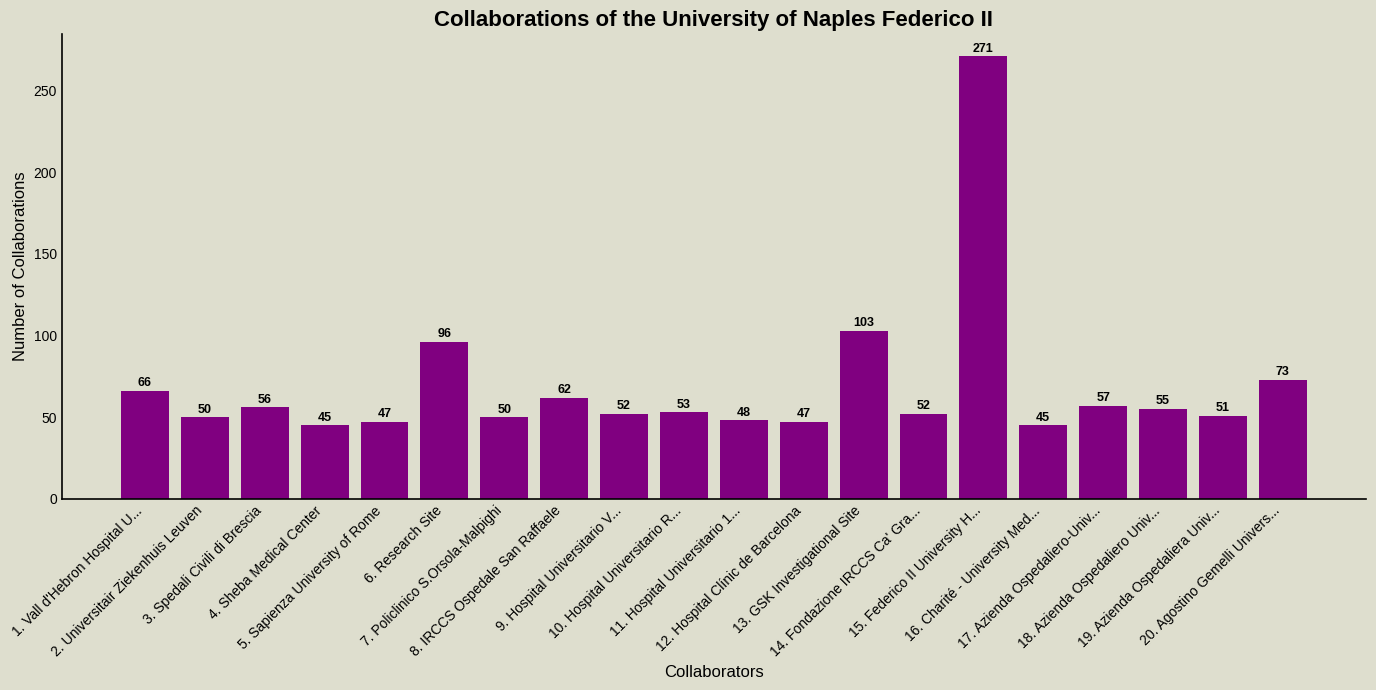

In [ ]:
# Load data
df = pd.read_csv(os.path.join(resultPath, "15_federicoIICollabSponsor.csv"))

df = df.head(20)

# Sort data by number of studies in descending order within each cancer type
df_sorted = df.sort_values(by=['Sponsors/Collaborators', 'Number of Collaborations'], ascending=[False, True])

# Limit cancer type name length for better display
max_len = 30  # maximum characters for title
df_sorted['Collaborator Abbreviated'] = [
    f"{i+1}. {t if len(t) <= max_len else t[:max_len - 6] + '...'}"
    for i, t in enumerate(df_sorted['Sponsors/Collaborators'])
]

# Apply style
plt.style.use(style_path)

# Create the plot
fig, ax = plt.subplots(figsize=(14, 7))  # Increased width to better accommodate labels
bar_color = 'purple'  # New color for bars
bars = ax.bar(df_sorted["Collaborator Abbreviated"], df_sorted["Number of Collaborations"], color=bar_color)
fig.patch.set_facecolor('#dedece')   # Figure background
ax.set_facecolor('#dedece')         # Plot area background

for i, val in enumerate(df_sorted["Number of Collaborations"]):
    ax.text(i, val + 1,  # posizione X = indice, Y = top della barra + offset
            f"{int(val)}",
            ha='center', va='bottom',
            fontsize=9, fontweight='bold', color='black')

# Title and axis labels
ax.set_title(f"Collaborations of the University of Naples Federico II", fontsize=16, fontweight='bold', color='black')
ax.set_ylabel("Number of Collaborations", fontsize=12, color='black')
ax.set_xlabel("Collaborators", fontsize=12, color='black')

# Grid removal and border customization
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Axis ticks
ax.tick_params(axis='y', labelsize=10, labelcolor='black')
plt.xticks(rotation=45, ha='right', fontsize=10, color='black')  # Reduced fontsize for better readability

# Adjust layout and save
plt.tight_layout()
image_file = os.path.join(output_path, "FedericoII_collaborators.png")
plt.savefig(image_file, dpi=300, facecolor=fig.get_facecolor())
print(f"Bar chart successfully saved to: {image_file}")

# Display plot
plt.show()

Seventeenth analytics: Principal Collaborations between Funding Entities

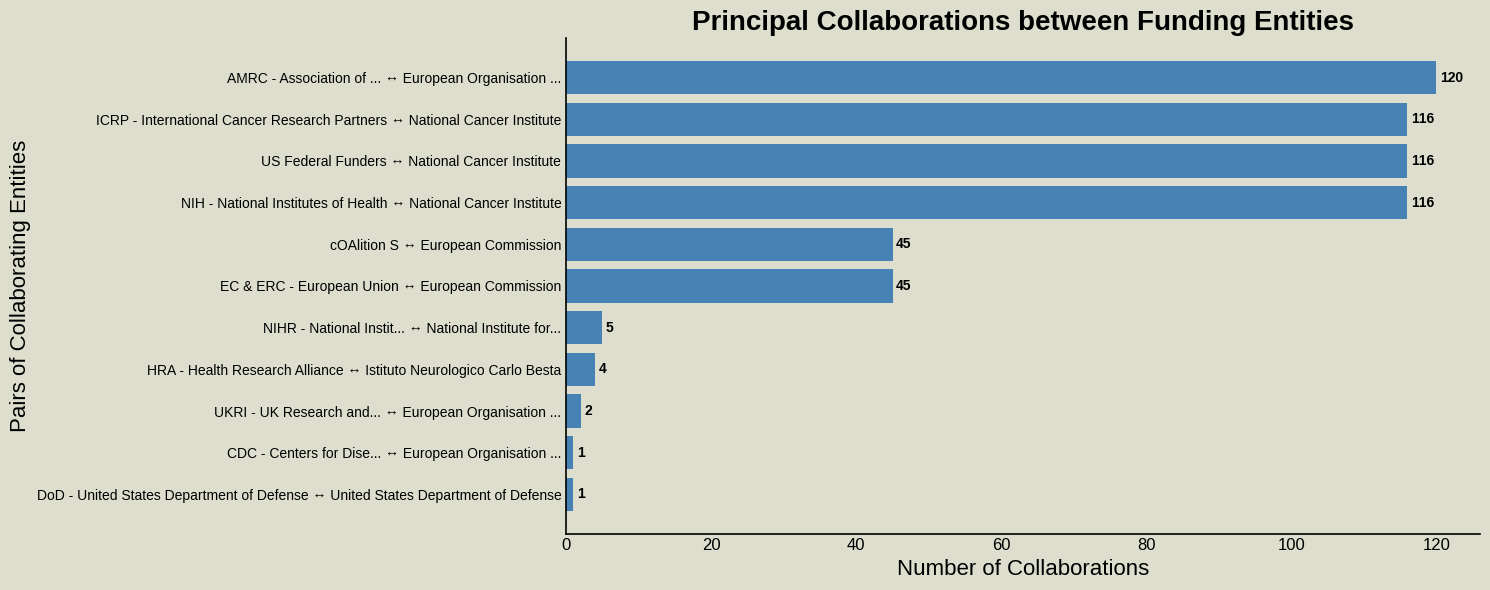

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Carica i dati
df = pd.read_csv(os.path.join(resultPath, "17_topCollaborators.csv"))

# Applica lo stile personalizzato
plt.style.use(style_path)

# Ordina per visualizzazione (già ordinato nel file, ma per sicurezza)
df_sorted = df.sort_values('Number of Collaborations')

# Troncamento dei nomi per leggibilità
max_len = 45
df_sorted["Pair"] = [
    f"{main[:max_len]} ↔ {collab[:max_len]}" if len(main) + len(collab) <= max_len * 2
    else f"{main[:max_len//2]}... ↔ {collab[:max_len//2]}..."
    for main, collab in zip(df_sorted["Main Funder"], df_sorted["Collaborating Funder"])
]

# Plot
fig, ax = plt.subplots(figsize=(15, max(6, 0.4 * len(df_sorted))))
fig.patch.set_facecolor('#dedece')
ax.set_facecolor('#dedece')

bars = ax.barh(df_sorted["Pair"], df_sorted["Number of Collaborations"], color='steelblue')

# Etichette a fine barra
for i, v in enumerate(df_sorted["Number of Collaborations"]):
    ax.text(v + 0.5, i, str(v), va='center', fontsize=10, color='black', fontweight='bold')

# Titolo
ax.set_title("Principal Collaborations between Funding Entities", fontsize=20, fontweight='bold', color='black')

# Etichette assi
ax.set_xlabel("Number of Collaborations", fontsize=16, color='black')
ax.set_ylabel("Pairs of Collaborating Entities", fontsize=16, color='black')

# Assi visibili
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Colore e spessore bordi
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Ticks
ax.tick_params(axis='x', labelsize=12, labelcolor='black')
ax.tick_params(axis='y', labelsize=10, labelcolor='black')

# Niente griglia
ax.grid(False)

# Layout pulito
plt.tight_layout()

# Salva immagine
output_file = os.path.join(output_path, "top_collaborators_barplot.png")
plt.savefig(output_file, dpi=300, facecolor=fig.get_facecolor())

# Mostra
plt.show()
